In [22]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:09<00:00, 46.1MB/s]
100% 812M/812M [00:09<00:00, 93.2MB/s]


In [25]:
 !ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [26]:
from zipfile import ZipFile
dataset="/content/dogs-vs-cats.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [27]:
from zipfile import ZipFile
dataset="/content/train.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [28]:
import os
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print("number of images:",file_count)


number of images: 25000


In [29]:
file_names=os.listdir("/content/train")
print(file_names)

['cat.3048.jpg', 'dog.1751.jpg', 'cat.11691.jpg', 'cat.4201.jpg', 'dog.806.jpg', 'cat.9937.jpg', 'dog.904.jpg', 'dog.7558.jpg', 'cat.6117.jpg', 'dog.9681.jpg', 'cat.3361.jpg', 'dog.11462.jpg', 'dog.12049.jpg', 'cat.8910.jpg', 'cat.7638.jpg', 'dog.9250.jpg', 'cat.325.jpg', 'dog.11534.jpg', 'dog.9254.jpg', 'dog.1571.jpg', 'dog.1813.jpg', 'cat.3218.jpg', 'dog.11443.jpg', 'dog.4110.jpg', 'dog.10817.jpg', 'dog.1027.jpg', 'dog.1899.jpg', 'dog.9936.jpg', 'cat.3429.jpg', 'dog.7628.jpg', 'cat.8055.jpg', 'dog.11401.jpg', 'dog.7900.jpg', 'cat.4647.jpg', 'dog.1517.jpg', 'dog.8652.jpg', 'dog.1973.jpg', 'dog.7487.jpg', 'cat.4751.jpg', 'cat.10441.jpg', 'cat.7596.jpg', 'cat.8762.jpg', 'cat.4277.jpg', 'dog.5981.jpg', 'cat.7939.jpg', 'cat.1020.jpg', 'cat.5625.jpg', 'dog.6359.jpg', 'cat.2067.jpg', 'dog.11675.jpg', 'cat.11165.jpg', 'cat.12232.jpg', 'cat.1582.jpg', 'cat.11100.jpg', 'dog.5334.jpg', 'cat.52.jpg', 'cat.8017.jpg', 'dog.3285.jpg', 'cat.7996.jpg', 'cat.6948.jpg', 'dog.280.jpg', 'dog.12005.jpg', 

In [30]:
from zipfile import ZipFile
dataset="/content/test1.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [31]:
import os
path,dirs,files=next(os.walk('/content/test1'))
file_count=len(files)
print("number of images:",file_count)

number of images: 12500


In [32]:
file_names=os.listdir("/content/test1")
print(file_names)

['9614.jpg', '329.jpg', '7494.jpg', '1642.jpg', '10602.jpg', '7568.jpg', '371.jpg', '3712.jpg', '12040.jpg', '11279.jpg', '5816.jpg', '2198.jpg', '11065.jpg', '9300.jpg', '9104.jpg', '8675.jpg', '2587.jpg', '949.jpg', '6950.jpg', '12075.jpg', '2942.jpg', '2785.jpg', '5805.jpg', '8703.jpg', '2516.jpg', '8279.jpg', '4185.jpg', '8720.jpg', '3850.jpg', '9894.jpg', '3750.jpg', '9515.jpg', '7287.jpg', '511.jpg', '8059.jpg', '10951.jpg', '7106.jpg', '6995.jpg', '1863.jpg', '5160.jpg', '3359.jpg', '6930.jpg', '7552.jpg', '5246.jpg', '8215.jpg', '5180.jpg', '2929.jpg', '532.jpg', '8013.jpg', '10209.jpg', '1612.jpg', '5531.jpg', '5481.jpg', '4416.jpg', '7289.jpg', '12407.jpg', '2328.jpg', '5952.jpg', '5966.jpg', '7878.jpg', '10747.jpg', '8349.jpg', '198.jpg', '9983.jpg', '4348.jpg', '9375.jpg', '1769.jpg', '4724.jpg', '4186.jpg', '6564.jpg', '6719.jpg', '8377.jpg', '7399.jpg', '10509.jpg', '7220.jpg', '2152.jpg', '1087.jpg', '9259.jpg', '1201.jpg', '4739.jpg', '3479.jpg', '2408.jpg', '7703.jpg',

In [34]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

<function matplotlib.pyplot.show(close=None, block=None)>

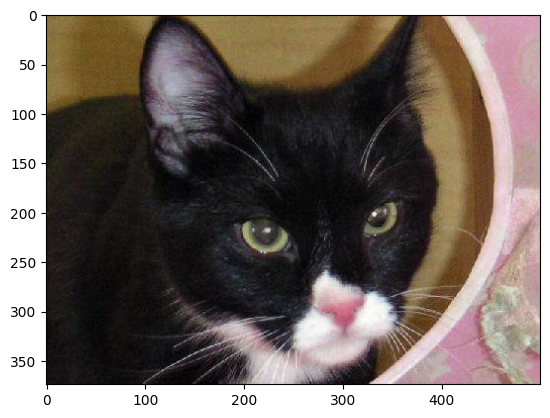

In [35]:
img=mpimg.imread("/content/train/cat.10001.jpg") 
imgplt=plt.imshow(img)
plt.show

In [36]:
file_names=os.listdir("/content/train")
for i in range(5):
  name=file_names[i]
  print(name[0:17])

cat.3048.jpg
dog.1751.jpg
cat.11691.jpg
cat.4201.jpg
dog.806.jpg


In [38]:
file_names=os.listdir("/content/train")
cat_count=0
dog_count=0

for img_file in file_names:
  name=img_file[0:3]

  if name=="cat":
     cat_count+=1

  if name=="dog":
     dog_count+=1


print("number of cat images:",cat_count)
print("number of dog images:",dog_count)


number of cat images: 12500
number of dog images: 12500


Resizing all the images

In [56]:
os.mkdir("/content/image resized2")

/content/train_new/Image_18.jpg 

In [57]:
original_folder="/content/train"
resized_folder="/content/image resized2"

for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+"/"+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert("RGB")

  newimgpath=resized_folder+"/"+filename
  img.save(newimgpath)


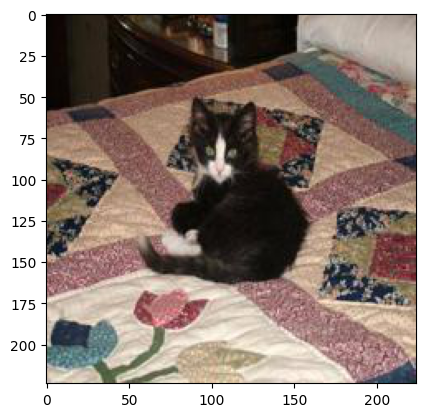

In [58]:
img=mpimg.imread("/content/image resized2/cat.1004.jpg")
imgplt=plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat>1

Dog-->0

In [59]:
filenames=os.listdir("/content/image resized2")

labels=[]

for i in range(2000):
    img_names=file_names[i]
    name=img_names[0:3]


    if name[0:3]=="cat" :
      labels.append(1)

    if name[0:3]=="dog":
      labels.append(0)


  
  

  

In [60]:
print(labels)

[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 

In [61]:
print(len(labels))

2000


In [62]:
print(len(filenames))

2000


In [63]:
print(filenames[0:5])


['cat.3048.jpg', 'dog.1751.jpg', 'cat.11691.jpg', 'cat.4201.jpg', 'dog.806.jpg']


In [64]:
print(labels[0:5])

[1, 0, 1, 1, 0]


In [65]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1053  947]


Converting all the resized images to numpy arrays

In [66]:
import cv2
import glob
import keras

In [67]:
image_directory="/content/image resized2/"
image_extension=["JPG","jpg"]

files=[]

[files.extend(glob.glob(image_directory+ "*." +i)) for i in image_extension]

cat_dogs_images = np.asarray([cv2.imread(file) for file in files])


In [68]:
print(cat_dogs_images)

[[[[ 68  65  74]
   [ 68  67  76]
   [ 67  66  75]
   ...
   [176 175 179]
   [176 172 178]
   [174 170 176]]

  [[ 70  67  76]
   [ 69  68  77]
   [ 68  67  76]
   ...
   [175 174 178]
   [175 171 176]
   [173 169 174]]

  [[ 70  67  76]
   [ 69  68  77]
   [ 68  67  76]
   ...
   [175 174 176]
   [173 172 174]
   [171 170 172]]

  ...

  [[ 52  58  57]
   [ 50  56  55]
   [ 52  58  57]
   ...
   [170 171 175]
   [155 155 161]
   [153 153 159]]

  [[ 61  66  67]
   [ 52  57  58]
   [ 48  53  54]
   ...
   [186 185 189]
   [189 187 193]
   [186 183 192]]

  [[ 86  91  92]
   [ 70  75  76]
   [ 57  62  63]
   ...
   [195 194 198]
   [221 218 227]
   [227 224 233]]]


 [[[110 142 177]
   [110 142 177]
   [110 142 177]
   ...
   [135 155 196]
   [135 155 196]
   [135 155 196]]

  [[103 135 170]
   [103 135 170]
   [104 136 171]
   ...
   [135 155 196]
   [135 155 196]
   [135 155 196]]

  [[ 99 131 166]
   [ 99 131 166]
   [ 99 131 166]
   ...
   [135 155 196]
   [135 155 196]
   [135 155

In [69]:
print(len(cat_dogs_images))

2000


In [70]:
type(cat_dogs_images)

numpy.ndarray

In [71]:
print(cat_dogs_images.shape)

(2000, 224, 224, 3)


In [72]:
X=cat_dogs_images
Y=np.asarray(labels)

In [73]:
print(Y)

[1 0 1 ... 0 0 1]


In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [75]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [76]:
print(Y_train.shape,Y_test.shape)

(1600,) (400,)


In [77]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [78]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [79]:
print(X_test)

[[[[118 106 100]
   [117 105  99]
   [ 96  86  79]
   ...
   [ 93  64  57]
   [ 93  64  57]
   [ 83  54  47]]

  [[101  93  86]
   [113 105  98]
   [109 101  94]
   ...
   [103  77  70]
   [105  79  72]
   [105  79  72]]

  [[ 77  76  66]
   [ 96  95  85]
   [100  99  89]
   ...
   [110  91  84]
   [110  91  84]
   [115  96  89]]

  ...

  [[187 179 179]
   [212 207 204]
   [238 237 233]
   ...
   [178 180 181]
   [165 167 168]
   [139 141 142]]

  [[206 187 190]
   [211 197 198]
   [228 218 218]
   ...
   [178 180 181]
   [163 165 166]
   [133 135 136]]

  [[233 210 214]
   [216 197 200]
   [215 201 202]
   ...
   [180 182 183]
   [172 174 175]
   [148 150 151]]]


 [[[107 104 136]
   [116 113 145]
   [126 123 155]
   ...
   [ 64  69 114]
   [ 64  69 114]
   [ 65  70 115]]

  [[128 125 157]
   [130 127 159]
   [133 130 162]
   ...
   [ 64  69 114]
   [ 65  70 115]
   [ 65  70 115]]

  [[139 136 168]
   [135 132 164]
   [130 127 159]
   ...
   [ 64  69 114]
   [ 65  70 115]
   [ 65  70

In [80]:
print(X_test_scaled)

[[[[0.4627451  0.41568627 0.39215686]
   [0.45882353 0.41176471 0.38823529]
   [0.37647059 0.3372549  0.30980392]
   ...
   [0.36470588 0.25098039 0.22352941]
   [0.36470588 0.25098039 0.22352941]
   [0.3254902  0.21176471 0.18431373]]

  [[0.39607843 0.36470588 0.3372549 ]
   [0.44313725 0.41176471 0.38431373]
   [0.42745098 0.39607843 0.36862745]
   ...
   [0.40392157 0.30196078 0.2745098 ]
   [0.41176471 0.30980392 0.28235294]
   [0.41176471 0.30980392 0.28235294]]

  [[0.30196078 0.29803922 0.25882353]
   [0.37647059 0.37254902 0.33333333]
   [0.39215686 0.38823529 0.34901961]
   ...
   [0.43137255 0.35686275 0.32941176]
   [0.43137255 0.35686275 0.32941176]
   [0.45098039 0.37647059 0.34901961]]

  ...

  [[0.73333333 0.70196078 0.70196078]
   [0.83137255 0.81176471 0.8       ]
   [0.93333333 0.92941176 0.91372549]
   ...
   [0.69803922 0.70588235 0.70980392]
   [0.64705882 0.65490196 0.65882353]
   [0.54509804 0.55294118 0.55686275]]

  [[0.80784314 0.73333333 0.74509804]
   [0.8

In [81]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [82]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [83]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [84]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [85]:
model.fit(X_train_scaled, Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 81s 2s/step - loss: 0.2080 - acc: 0.9175
Epoch 2/5
50/50 [==============================] - 70s 1s/step - loss: 0.0766 - acc: 0.9737
Epoch 3/5
50/50 [==============================] - 70s 1s/step - loss: 0.0568 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 70s 1s/step - loss: 0.0449 - acc: 0.9862
Epoch 5/5
50/50 [==============================] - 69s 1s/step - loss: 0.0367 - acc: 0.9887


In [86]:
loss,acc=model.evaluate(X_test_scaled,Y_test)
print("Test Loss=",loss)
print("Test Accuracy=",acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0523 - acc: 0.9850
Test Loss= 0.05230055749416351
Test Accuracy= 0.9850000143051147


Path of the image to be predicted: /content/image resized2/dog.10494.jpg


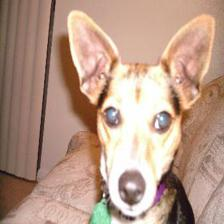

1/1 [==============================] - 0s 64ms/step
[[ 0.84984976 -2.4625318 ]]
0
The image represents a dog


In [90]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The image represents a cat')

else:
  print('The image represents a dog')